<a href="https://colab.research.google.com/github/Inyrkz/PneumoniaX/blob/Inyrkz-covid/CovidTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating models directory
import os
if not os.path.isdir('models'):
  os.mkdir('models')

# checking TensorFlow version and GPU usage
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Tensorflow version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


In [3]:
# Clone and Explore Dataset
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 40.75 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [4]:
# setting path to the main directory
main_dir = "/content/datasets/Data"

In [5]:
# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')

In [6]:
# Setting path to the test directory
test_dir = os.path.join(main_dir, 'test')

In [7]:
# Directory with train covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

# Directory with train normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

In [8]:
# Directory with test covid image
test_covid_dir = os.path.join(test_dir, 'COVID19')

# Directory with test normal image
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [9]:
# Creating a list of filenames in each directory
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])  # printing a list of the first 10 names

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(456).jpg', 'COVID19(366).jpg', 'COVID19(59).jpg', 'COVID19(461).jpg', 'COVID19(342).jpg', 'COVID19(151).jpg', 'COVID19(195).jpg', 'COVID19(72).jpg', 'COVID19(325).jpg', 'COVID19(60).jpg']
['NORMAL(80).jpg', 'NORMAL(918).jpg', 'NORMAL(1312).jpg', 'NORMAL(1404).jpg', 'NORMAL(961).jpg', 'NORMAL(1412).jpg', 'NORMAL(311).jpg', 'NORMAL(829).jpg', 'NORMAL(1295).jpg', 'NORMAL(1407).jpg']
['COVID19(396).jpg', 'COVID-19 (750).jpg', 'COVID19(433).jpg', 'COVID-19 (875).jpg', 'COVID-19 (791).jpg', 'COVID-19 (871).jpg', 'COVID19(385).jpg', 'COVID-19 (809).jpg', 'COVID-19 (371).jpg', 'COVID19(391).jpg']
['NORMAL(1136).jpg', 'NORMAL(1165).jpg', 'NORMAL(889).jpg', 'NORMAL(731).jpg', 'NORMAL(1037).jpg', 'NORMAL(211).jpg', 'NORMAL(435).jpg', 'NORMAL(1287).jpg', 'NORMAL(10).jpg', 'NORMAL(151).jpg']


In [10]:
# Printing total number of images present in each set
print('Total no of images in training set:', len(train_covid_names
                                                + train_normal_names))

print("Total no of images in test set:", len(test_covid_names
                                            + test_normal_names))

Total no of images in training set: 1811
Total no of images in test set: 484


In [11]:
# Data Visualization
import matplotlib.image as mpimg

# Setting the no of rows and columns
ROWS = 4
COLS = 4

# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure
# when using pyplot
fig.set_size_inches(12, 12)

<Figure size 864x864 with 0 Axes>

In [12]:
# get the directory to each image file in the trainset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]
print(covid_pic)
print(normal_pic)

# merge covid and normal lists
merged_list = covid_pic + normal_pic
print(merged_list)

['/content/datasets/Data/train/COVID19/COVID19(456).jpg', '/content/datasets/Data/train/COVID19/COVID19(366).jpg', '/content/datasets/Data/train/COVID19/COVID19(59).jpg', '/content/datasets/Data/train/COVID19/COVID19(461).jpg', '/content/datasets/Data/train/COVID19/COVID19(342).jpg', '/content/datasets/Data/train/COVID19/COVID19(151).jpg', '/content/datasets/Data/train/COVID19/COVID19(195).jpg', '/content/datasets/Data/train/COVID19/COVID19(72).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(80).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(918).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1312).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1404).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(961).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1412).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(311).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(829).jpg']
['/content/datasets/Data/train/COVID19/COVID19(456).jpg', '/content/datasets/Data/train/COVID19/COVID1

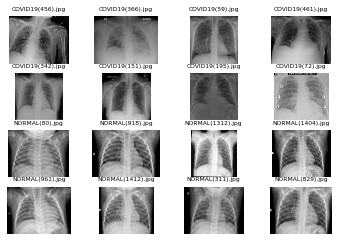

In [13]:
# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('/', 6)[6]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=6)
    # displaying data as image
    plt.imshow(img, cmap='gray')
        
plt.show()  # display the plot

In [14]:
# Data Preprocessing and Augumentation

# Generate training, testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,  # using 20% of training data for validation 
                                zoom_range=0.2,
                                horizontal_flip=True)

dgen_validation = ImageDataGenerator(rescale=1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

In [15]:
# Awesome HyperParameters!!!
TARGET_SIZE = (200, 200)
BATCH_SIZE = 32
CLASS_MODE = 'binary'  # for two classes; categorical for over 2 classes


# Connecting the ImageDataGenerator objects to our dataset
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=TARGET_SIZE,
                                                 subset='training',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

# CONFIRM if it should be dgen_validation.flow...
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)

test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [16]:
# Get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [17]:
# Get the image shape
train_generator.image_shape

(200, 200, 3)

In [18]:
# Building CNN Model
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu',
                input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0

In [19]:
# Compile the Model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Train the Model
history = model.fit(train_generator,
          epochs=30,
          validation_data=validation_generator,
          callbacks=[
          # Stopping our training if val_accuracy doesn't improve after 20 epochs
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           patience=20),
          # Saving the best weights of our model in the model directory
        
          # We don't want to save just the weight, but also the model architecture
          tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy'
                                             )
    ])


Epoch 1/30
46/46 [==============================] - 55s 1s/step - loss: 2.7053 - accuracy: 0.7191 - val_loss: 0.1929 - val_accuracy: 0.9503
Epoch 2/30
46/46 [==============================] - 51s 1s/step - loss: 0.2352 - accuracy: 0.9017 - val_loss: 0.1797 - val_accuracy: 0.9337
Epoch 3/30
46/46 [==============================] - 51s 1s/step - loss: 0.1891 - accuracy: 0.9232 - val_loss: 0.1353 - val_accuracy: 0.9392
Epoch 4/30
46/46 [==============================] - 51s 1s/step - loss: 0.1281 - accuracy: 0.9543 - val_loss: 0.1325 - val_accuracy: 0.9613
Epoch 5/30
46/46 [==============================] - 53s 1s/step - loss: 0.1020 - accuracy: 0.9656 - val_loss: 0.1677 - val_accuracy: 0.9365
Epoch 6/30
46/46 [==============================] - 53s 1s/step - loss: 0.1540 - accuracy: 0.9451 - val_loss: 0.1256 - val_accuracy: 0.9475
Epoch 7/30
46/46 [==============================] - 53s 1s/step - loss: 0.2331 - accuracy: 0.9300 - val_loss: 0.1021 - val_accuracy: 0.9641
Epoch 8/30
46/46 [==

In [21]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

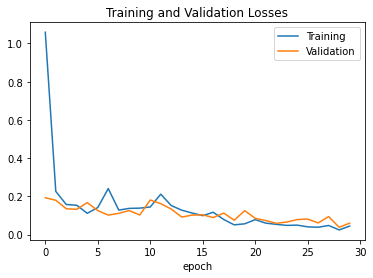

In [22]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

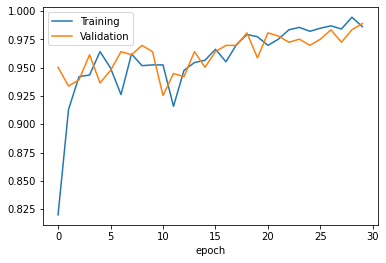

In [23]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [27]:
# loading the best perfoming model
model = tf.keras.models.load_model('/content/models/model_0.989.h5')

# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

16/16 [==============================] - 10s 634ms/step - loss: 0.0768 - accuracy: 0.9731
Test loss: 0.07684161514043808 Test Acc: 0.9731404781341553


In [28]:
# Making a Single Prediction
import numpy as np
from keras.preprocessing import image

# load and resize image to 200x200
test_image = image.load_img('/content/datasets/Data/test/COVID19/COVID-19 (457).jpg',
                            target_size=(200,200))

# convert image to numpy array
images = image.img_to_array(test_image)
# expand dimension of image
images = np.expand_dims(images, axis=0)
# making prediction with model
prediction = model.predict(images)
    
if prediction == 0:
  print('COVID Detected')
else:
  print('Report is Normal')

COVID Detected
